<a href="https://colab.research.google.com/github/avishek-astra/Deep-Learning/blob/main/ParametricexperimentsGradientDescent1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# make equation look nicer
from IPython.display import display,set_matplotlib_formats
set_matplotlib_formats('svg')
import decimal
decimal.getcontext().prec=28

<ipython-input-68-9f1686387421>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [ ]:
#gradient descent in 1D
def fx(x):
  return np.sin(x)*np.exp(-x**2*0.05)
#derivative function
def deriv(x):
  return  np.cos(x)*np.exp(-x**2*0.05) -np.sin(x)*.1*x*np.exp(-x**2*0.05)


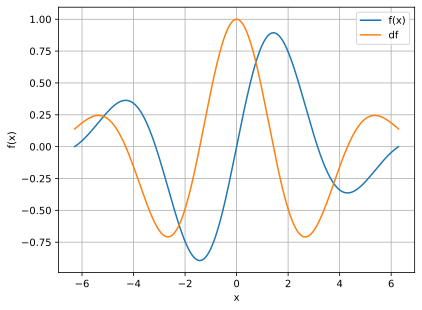

In [ ]:
#plot the function and its derivative
#define a range for x
x=np.linspace(-2*(np.pi),2*(np.pi),401)
#plotting
plt.plot(x,fx(x),x,deriv(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df'])
plt.show()


[6.09468975]


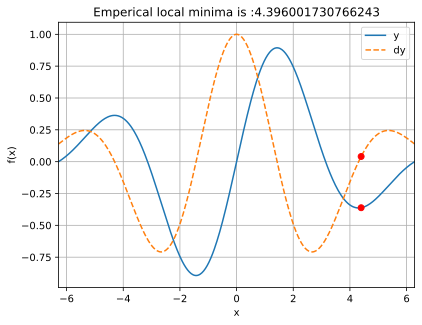

In [ ]:
#random starting point
localmin=np.random.choice(x,1)
print(localmin)

#learning parameters-
learning_rate=.01
training_epochs=1000
#run through training
for i in range(training_epochs):
  grad=deriv(localmin)
  localmin=localmin-learning_rate*grad
#plot the result
plt.plot(x,fx(x),x,deriv(x),'--')
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')
plt.grid()
plt.xlim(x[[0,-1]])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.title(f'Emperical local minima is :{localmin[0]}')
plt.show()

parametric experiments


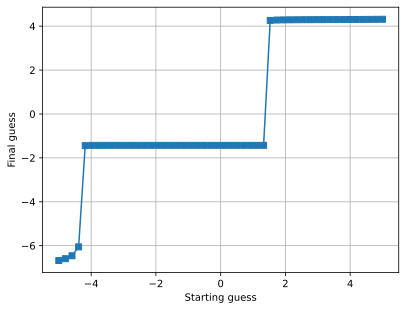

In [ ]:
#Experiment 1: systematically varying the starting locatons
startlocs=np.linspace(-5,5,50)
finalres=np.zeros(len(startlocs))
#loop over starting points
for idx,localmin in enumerate(startlocs):
  #run through training
  for i in range(training_epochs):
    grad=deriv(localmin)
    localmin=localmin-learning_rate*grad
  #stores the final guess
  finalres[idx]=localmin
#plot the result
plt.plot(startlocs,finalres,'s-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.grid()
plt.show()

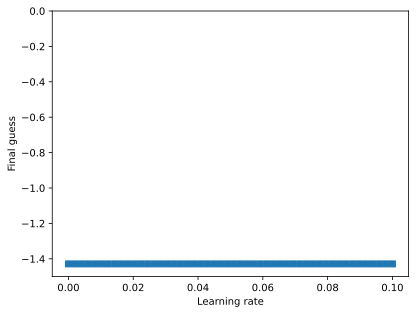

In [ ]:
#experiment 2: systematically varying the learning rate
learningrates=np.linspace(1e-10,1e-1,50)
finalres=np.zeros(len(learningrates))
#loop over starting points
for idx,learningRate in enumerate(learningrates):
  #force starting guess to zero
  localmin=0
  #run through training
  for i in range(training_epochs):
    grad=deriv(localmin)
    localmin=localmin-learning_rate*grad
  #stores the final guess
  finalres[idx]=localmin
#plot the result
plt.plot(learningrates,finalres,'s-')
plt.ylim(-1.5, 0)  # Adjust the range to include 0

plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()

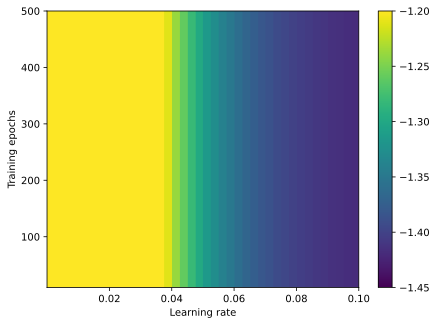

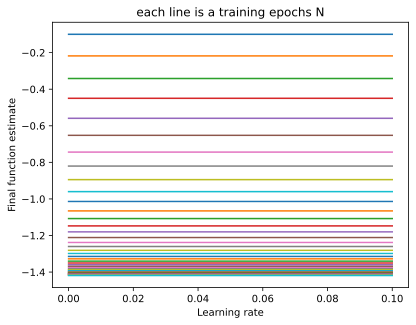

In [ ]:
#experiment 3: interaction between learnng rates and training epochs
#setup paramemters
learningrates=np.linspace(1e-10,1e-1,50)
training_epochs=np.linspace(10,500,40)
#initialize matrix to store results
finalres=np.zeros((len(learningrates),len(training_epochs)))
#loop over learning rates
for Lidx,learningRate in enumerate(learningrates):
  #loop over training epochs
  for Eidx,trainingEpoch in enumerate(training_epochs):
    #run through traing (again fixing starting location)
    localmin=0
    for i in range(int(trainingEpoch)):
      grad=deriv(localmin)
      localmin=localmin-learning_rate*grad
    #stores the final guess
    finalres[Lidx,Eidx]=localmin
#plot the results
fig,ax=plt.subplots(figsize=(7,5))
plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.colorbar()
plt.show()
#another visualization
plt.plot(learningrates,finalres)
plt.xlabel('Learning rate')
plt.ylabel('Final function estimate')
plt.title('each line is a training epochs N')
plt.show()

